**1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.**

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

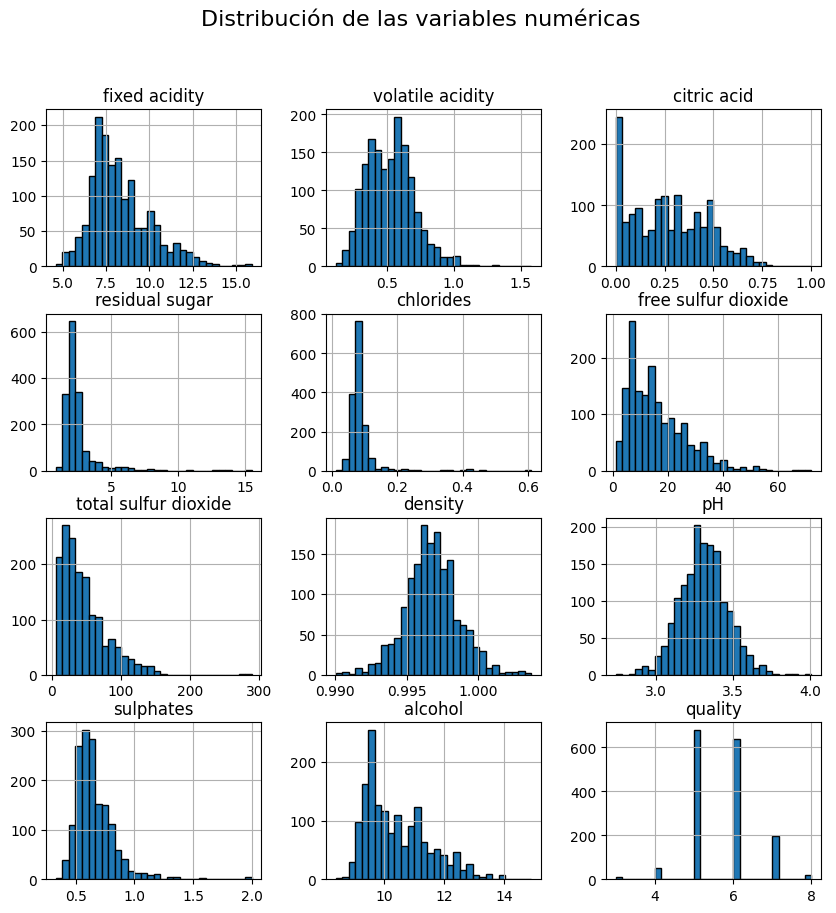


Gráfico de dispersión entre variables 'alcohol' y 'quality':


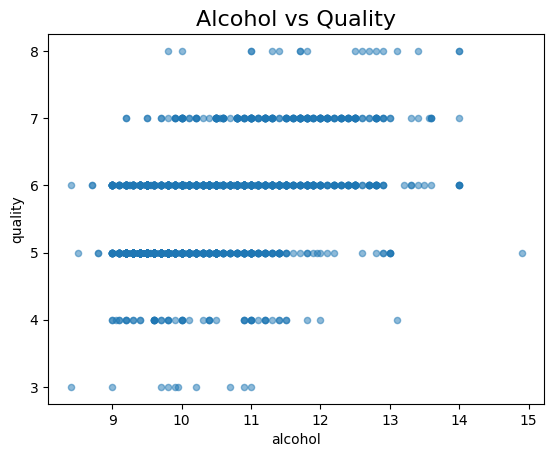


Matriz de correlación:


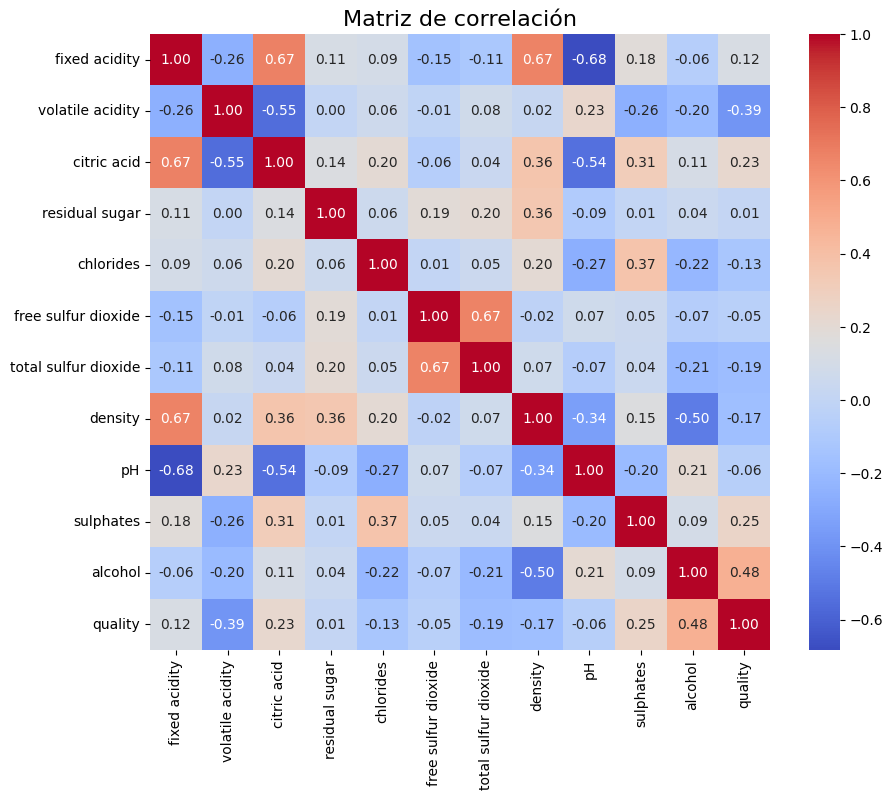


Detección de valores atípicos - Boxplots:


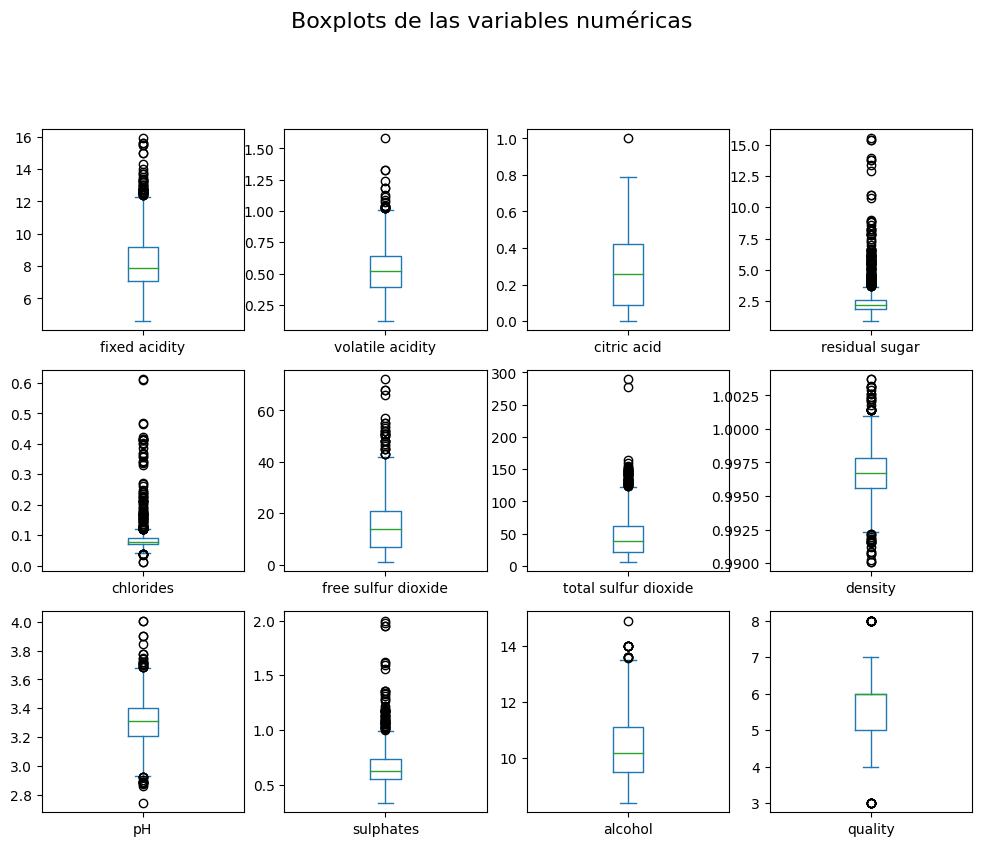


Valores faltantes por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Mapa de calor de los valores nulos:


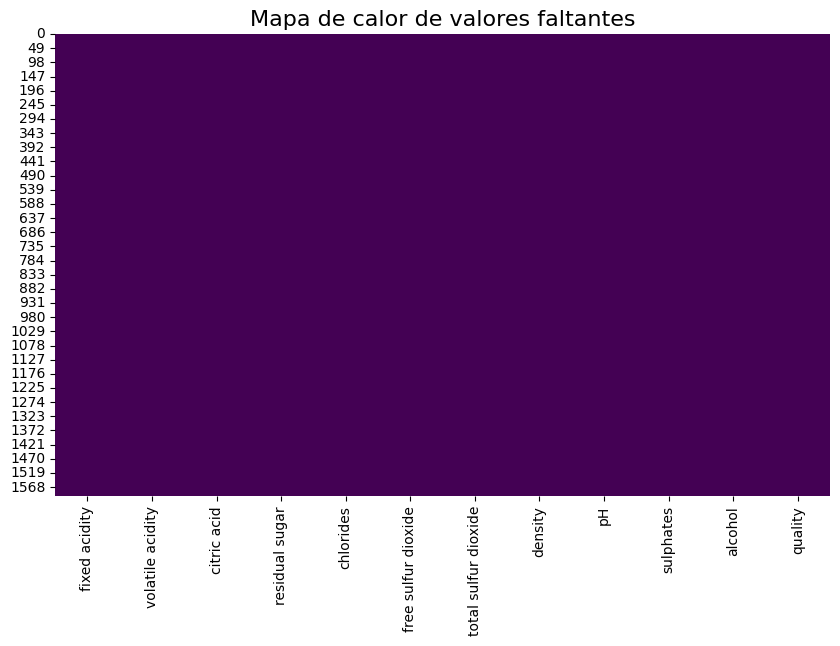


Distribución de la variable 'quality':


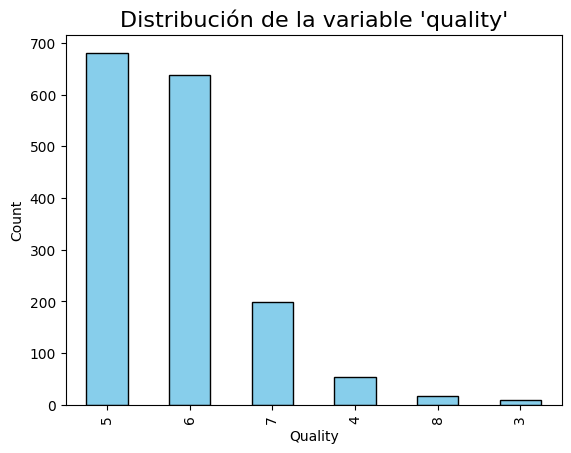


Relación entre 'quality' y 'alcohol' - Boxplot:


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


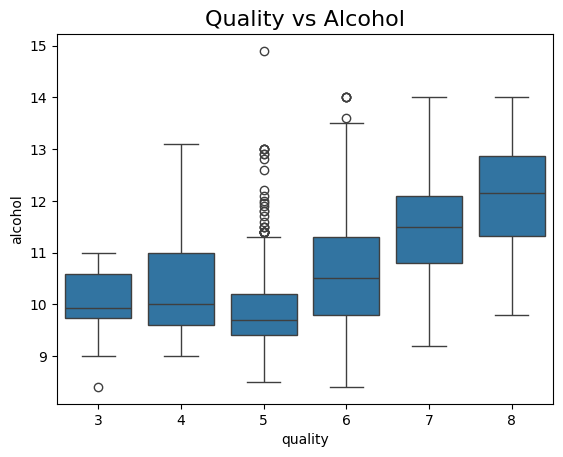

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv('winequality-red.csv')

# 1. Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# 2. Obtener la información general del dataset
print("\nInformación general del dataset:")
print(df.info())

# 3. Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
print(df.describe())

# 4. Visualización de distribuciones - Histogramas
print("\nVisualización de histogramas:")
df.hist(figsize=(10, 10), bins=30, edgecolor='black')
plt.suptitle("Distribución de las variables numéricas", fontsize=16)
plt.show()

# 5. Visualización de relaciones entre variables numéricas - Gráfico de dispersión
print("\nGráfico de dispersión entre variables 'alcohol' y 'quality':")
df.plot(kind='scatter', x='alcohol', y='quality', alpha=0.5)
plt.title("Alcohol vs Quality", fontsize=16)
plt.show()

# 6. Matriz de correlación y mapa de calor
print("\nMatriz de correlación:")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación", fontsize=16)
plt.show()

# 7. Detección de valores atípicos - Boxplots
print("\nDetección de valores atípicos - Boxplots:")
df.plot(kind='box', subplots=True, layout=(4,4), figsize=(12,12), sharex=False, sharey=False)
plt.suptitle("Boxplots de las variables numéricas", fontsize=16)
plt.show()

# 8. Detección de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de los valores nulos
print("\nMapa de calor de los valores nulos:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes", fontsize=16)
plt.show()

# 9. Gráfico de barras para la distribución de la variable 'quality'
print("\nDistribución de la variable 'quality':")
df['quality'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribución de la variable 'quality'", fontsize=16)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

# 10. Boxplot para analizar la relación entre 'quality' y 'alcohol'
print("\nRelación entre 'quality' y 'alcohol' - Boxplot:")
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title("Quality vs Alcohol", fontsize=16)
plt.show()


**2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.**

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Identificar y eliminar valores atípicos (opcional)
# Usamos el rango intercuartílico (IQR) para identificar valores atípicos
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Filtramos las filas que tienen valores atípicos en cualquiera de las columnas numéricas
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Número de filas después de eliminar outliers: {df_clean.shape[0]}")

# 2. Normalización de las variables numéricas
scaler = StandardScaler()
# Normalizamos todas las variables excepto 'quality'
features = df_clean.drop('quality', axis=1)
df_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# 3. Añadir de nuevo la columna de 'quality' sin normalizar
df_scaled['quality'] = df_clean['quality'].values

# 4. Transformación de la variable objetivo 'quality' (opcional)
# Por ejemplo, podríamos categorizar la calidad en baja (<= 5), media (6) y alta (>=7)
df_scaled['quality_category'] = pd.cut(df_scaled['quality'], bins=[2, 5, 6, 8], labels=['Baja', 'Media', 'Alta'])

# Verificamos el dataset limpio y preprocesado
print(df_scaled.head())


Número de filas después de eliminar outliers: 1179
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   
1      -0.248346          2.174284    -1.375744        0.940570   1.356569   
2      -0.248346          1.443297    -1.152735        0.259965   0.937312   
3       2.084173         -1.480652     1.746386       -0.647508  -0.250582   
4      -0.522760          1.077803    -1.375744       -0.647508  -0.180706   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.457421             -0.316839  0.763633  1.407839  -0.614084   
1             1.135446              0.947754  0.135771 -0.946440   0.419963   
2            -0.002316              0.449581  0.261343 -0.490773   0.161451   
3             0.225236              0.679507  0.889206 -1.250217  -0.441743   
4            -0.457421             -0.316839  0.763633  1.407839  -0.614084   

    a

**3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características**

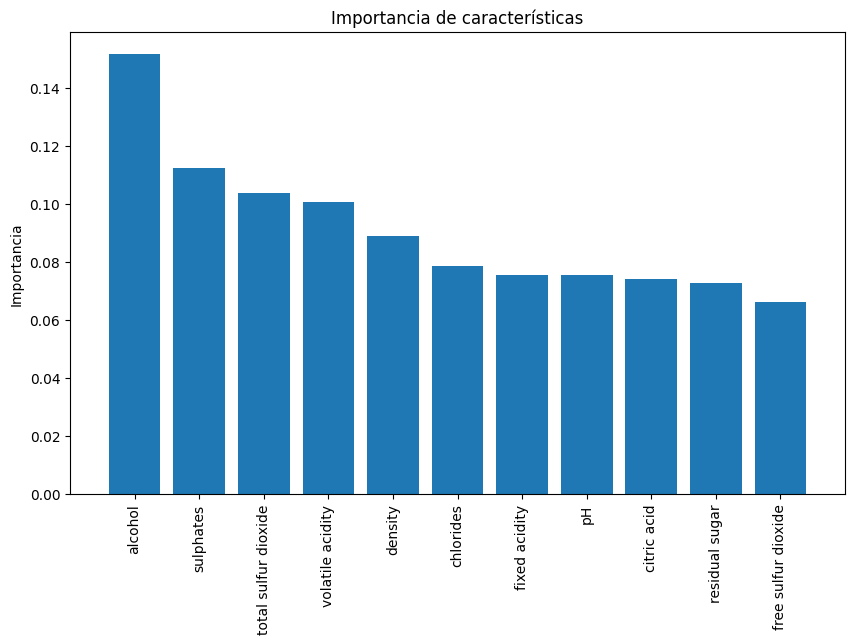

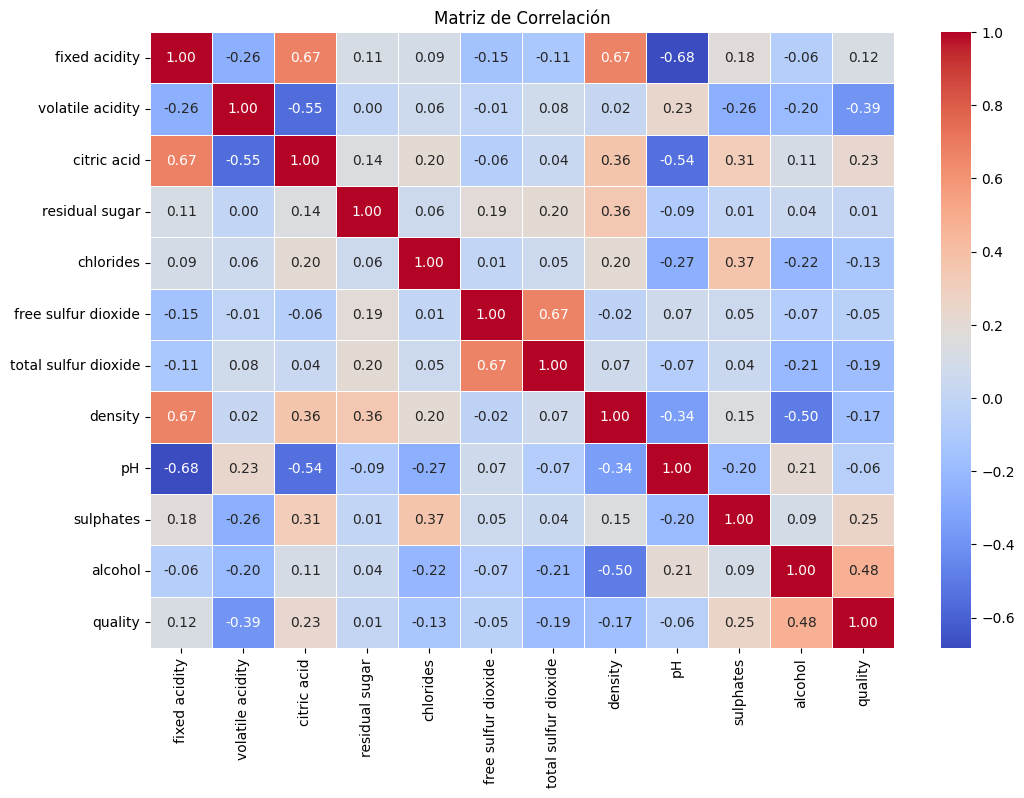

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/loc

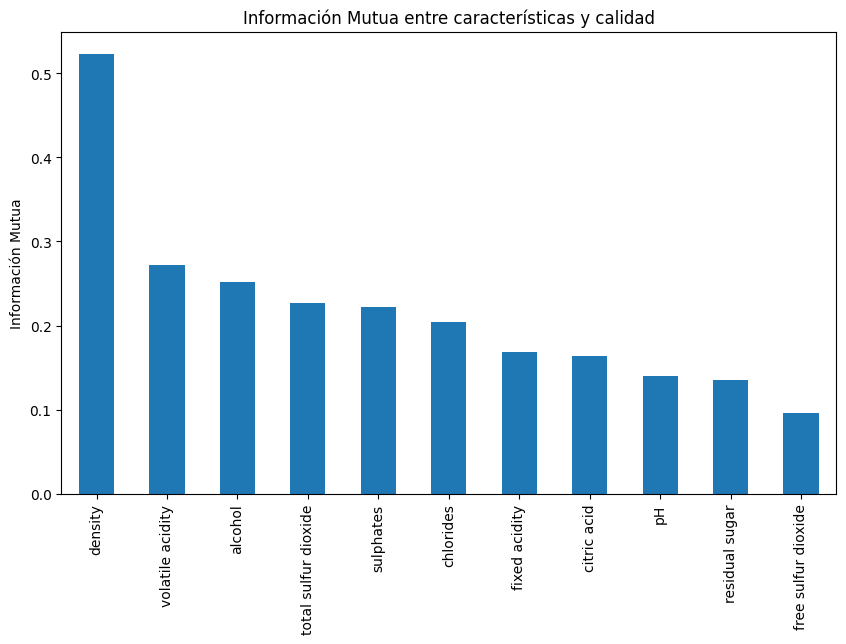

Características seleccionadas: ['density', 'volatile acidity', 'alcohol', 'total sulfur dioxide', 'sulphates', 'chlorides', 'fixed acidity', 'citric acid', 'pH', 'residual sugar']


In [6]:
# 3. Seleccionar características relevantes

# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mutual_info_score

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['quality'])  # Eliminar solo la columna 'quality'
y = df['quality']

# Método 1: Importancia de características con RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Obtener la importancia de las características
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.ylabel("Importancia")
plt.show()

# Método 2: Selección de características basada en correlación
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Calcular la información mutua para cada característica
mi = [mutual_info_score(X[col], y) for col in X.columns]
mi = pd.Series(mi, index=X.columns)
mi = mi.sort_values(ascending=False)

# Visualizar información mutua
plt.figure(figsize=(10, 6))
mi.plot(kind='bar')
plt.title("Información Mutua entre características y calidad")
plt.ylabel("Información Mutua")
plt.show()

# Características seleccionadas basadas en la información mutua
selected_features = mi[mi > 0.1].index.tolist()
print("Características seleccionadas:", selected_features)


**4. Dividir el dataset en Train y Test para evaluar correctamente el modelo**

In [7]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df.drop(columns=['quality'])  # Utiliza solo las características relevantes
y = df['quality']

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print(f'Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}')
print(f'Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}')


Dimensiones del conjunto de entrenamiento: (1279, 11), (1279,)
Dimensiones del conjunto de prueba: (320, 11), (320,)


**5. Entrenar el modelo configurando los diferentes hiperparámetros.**

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Crear el modelo
dt = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo y evaluar su precisión utilizando validación cruzada
scores = cross_val_score(dt, X_train, y_train, cv=5)

# Mostrar resultados
print("Precisión media del modelo:", scores.mean())


Precisión media del modelo: 0.6012714460784314


**6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Definir características (X) y variable objetivo (y)
X = df.drop(columns=['quality'])
y = df['quality']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predecir las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

# Calcular y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Reporte de Clasificación:\n", report)
print("Matriz de Confusión:\n", conf_matrix)


Reporte de Clasificación:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320

Matriz de Confusión:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]


**7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo**

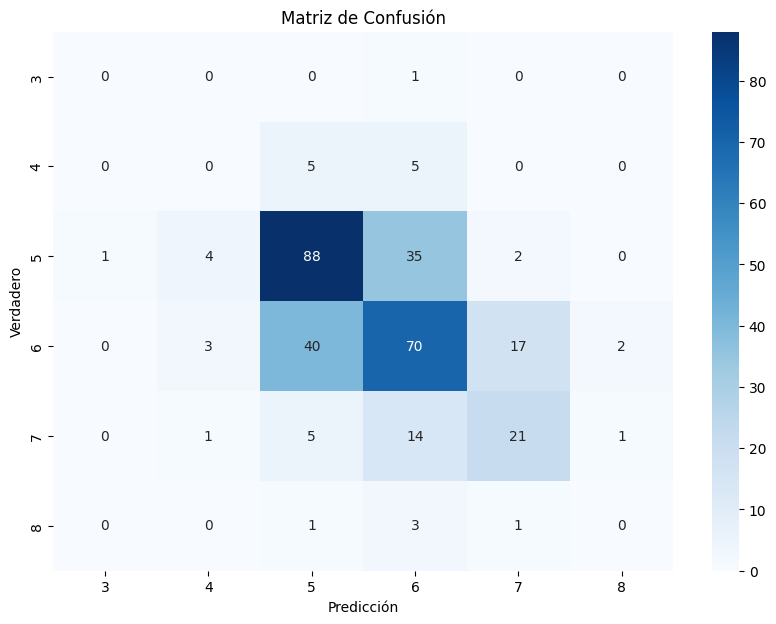

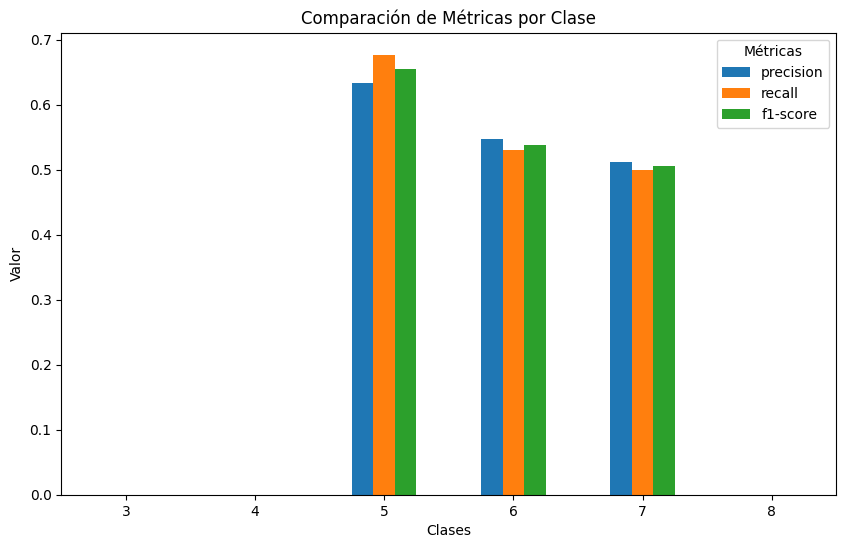

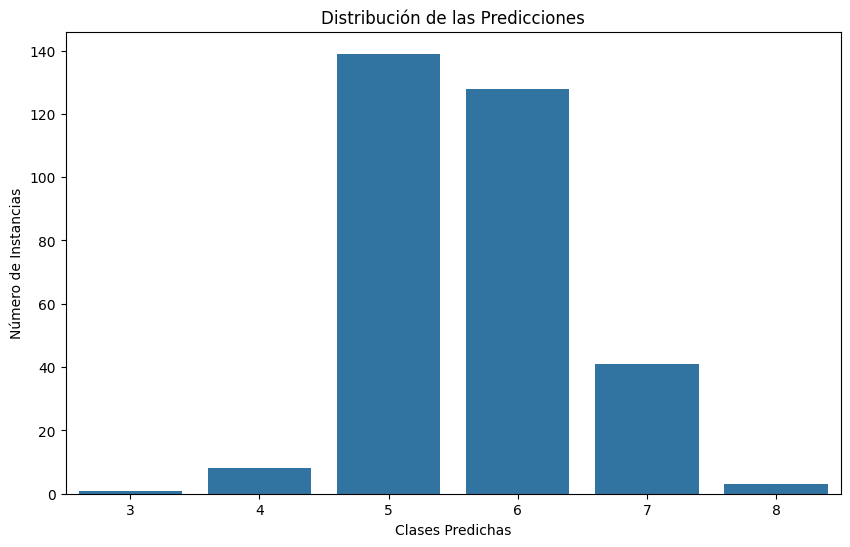

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import pandas as pd

# 1. Matriz de Confusión
plt.figure(figsize=(10, 7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# 2. Reporte de Clasificación
report = classification_report(y_test, y_pred, output_dict=True)
metrics = ['precision', 'recall', 'f1-score']
classes = report.keys()

# Filtramos las métricas para las clases y eliminamos promedios
metrics_data = {metric: [report[cls][metric] for cls in classes if cls not in ['accuracy', 'macro avg', 'weighted avg']] for metric in metrics}

# Crear DataFrame para visualizar
metrics_df = pd.DataFrame(metrics_data)
metrics_df.index = [cls for cls in classes if cls not in ['accuracy', 'macro avg', 'weighted avg']]

# Gráfica de Barras de las Métricas
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación de Métricas por Clase')
plt.ylabel('Valor')
plt.xlabel('Clases')
plt.xticks(rotation=0)
plt.legend(title='Métricas')
plt.show()

# 3. Distribución de las Predicciones
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred)
plt.title('Distribución de las Predicciones')
plt.xlabel('Clases Predichas')
plt.ylabel('Número de Instancias')
plt.show()
